<a href="https://colab.research.google.com/github/hyunicecream/Natural-Language-Processing-NLP-/blob/main/7_9_%EA%B8%88_Group(popcorn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Word Embedding & LSTM을 이용한 감성분석
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pickle

# pickle로 파일을 불러온다. 
with open('/content/drive/MyDrive/머신러닝/popcorn.pkl', 'rb') as f:
    xd_train, yd_train, xd_test, yd_test = pickle.load(f)

xd_train[1]

'first time saw movi eighti review thriller still actual some newer movi focu similar topic match french mileston presid obvious kennedi get shot open car public appear the result huge investig find lee harvey oswald figur movi guilti one member juri insist inquiri reveal surpris evid unlik oliv stone jfk movi plot one play emot concentr excit descript conspiraci everyth fit togeth draw new pictur assassin even real psycholog experi use explan crime scene compar jfk movi reason intellig thrill part plot found lot newer movi kind deja sometim sit cinema comm icar must see it uniqu brilliant music ennio morricon wonder thi movi deserv good rank hollywood product would famou sure'

In [5]:
# 학습, 시험 데이터를 합쳐서 (vocabulary)을 구축한다.
x_data = xd_train + xd_test
y_traget = np.array(yd_train + yd_test).reshape(-1,1)

In [ ]:
# 사전을 구축하고 학습 데이터를 워드 인덱스로 표현한다.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_data)
x_idx = tokenizer.texts_to_sequences(x_data)
#x_idx

In [15]:
# vocabulary
word2idx = tokenizer.word_index
word2idx['<PAD>'] = 0
word2idx['<PAD>']

0

In [ ]:
# 각 리뷰의 길이를 측정하고, 평균 길이를 구한다.
x_len = [len(x) for x in x_idx]

In [16]:
print('평균 =', np.mean(x_len))
print('최소 =', np.min(x_len))
print('최대 =', np.max(x_len))
print('중앙값 =', np.median(x_len))

평균 = 123.57604
최소 = 5
최대 = 1436
중앙값 = 92.0


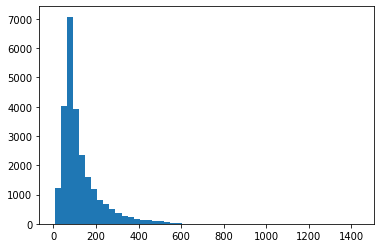

In [17]:
# 길이 분포를 확인한다.
plt.hist(x_len, bins=50)
plt.show()

In [19]:
# 각 리뷰의 길이를 max_seq_len로 맞춘다. 길면 자르고, 짧으면 padding을 추가한다.
# padding='post':
# Numpy로 패딩을 진행하였을 때와는 패딩 결과가 다른데 그 이유는 pad_sequences는 기본적으로 문서의 
# 뒤에 0을 채우는 것이 아니라 앞에 0으로 채우기때문입니다. 뒤에 0을 채우고 싶다면 인자로 padding = 'post'를 준다.
MAX_SEQ_LEN = 200
x_review = pad_sequences(x_idx, maxlen=MAX_SEQ_LEN, padding='post', truncating='post')
x_review[5000]

array([  377,   125,  2498,   125,    40,    86,    48,   245,   285,
         108,     1,   325,   511,    17,    13,  1568,  5574,   137,
        2990,    86,  2028,   220,    78,    21,  1757,    16,    10,
          21,    16,  1840,   161,   141,    90,    33,   108,  1253,
           4,   220,   319,   558,   226, 34468,   394,     1,   903,
         564,   563,   132,   108,    45,   168,  2028,   220,    78,
         127,    29,   493,    58,    10,     8,     1,    27,  1330,
         489,  8359,   121,  4599,    45,    47,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [20]:
# 학습 데이터와 시험 데이터로 분리한다. 
x_train, x_test, y_train, y_test = train_test_split(x_review, y_traget, test_size=0.2)

In [21]:
# Embedding & LSTM 모델을 생성한다. 
vocab_size = len(word2idx)
EMBEDDING_DIM = 32
HIDDEN_DIM = 64

x_input = Input = Input(batch_shape=(None, x_train.shape[1]))
e_layer = Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM)(x_input)
e_layer = Dropout(rate=0.5)(e_layer)
r_layer = LSTM(HIDDEN_DIM, dropout=0.5)(e_layer)
y_output = Dense(1, activation='sigmoid')(r_layer)

model = Model(x_input, y_output)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005))
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 32)           1580224   
_________________________________________________________________
dropout (Dropout)            (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,605,121
Trainable params: 1,605,121
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 학습 
hist = model.fit(x_train, y_train, validation_data= (x_test, y_test), batch_size= 1024, epochs=30)

Epoch 1/30
20/20 [==============================] - 7s 60ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 2/30
20/20 [==============================] - 1s 41ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 3/30
20/20 [==============================] - 1s 43ms/step - loss: 0.6925 - val_loss: 0.6925
Epoch 4/30
20/20 [==============================] - 1s 41ms/step - loss: 0.6917 - val_loss: 0.6903
Epoch 5/30
20/20 [==============================] - 1s 41ms/step - loss: 0.6877 - val_loss: 0.6896
Epoch 6/30
20/20 [==============================] - 1s 41ms/step - loss: 0.6864 - val_loss: 0.6856
Epoch 7/30
20/20 [==============================] - 1s 42ms/step - loss: 0.6243 - val_loss: 0.5481
Epoch 8/30
20/20 [==============================] - 1s 42ms/step - loss: 0.4953 - val_loss: 0.4366
Epoch 9/30
20/20 [==============================] - 1s 42ms/step - loss: 0.4019 - val_loss: 0.3708
Epoch 10/30
20/20 [==============================] - 1s 42ms/step - loss: 0.3203 - val_loss: 0.3232
Epoch 11/

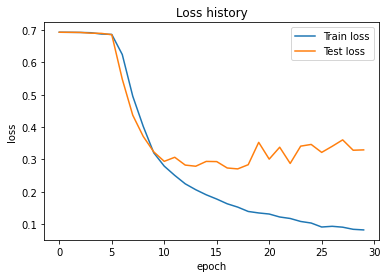

In [24]:
# Loss histroy를 그린다.
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label = 'Test loss')
plt.legend()
plt.title("Loss history")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [25]:
# 시험 데이터로 학습 성능을 평가한다.
pred = model.predict(x_test)
y_pred = np.where(pred > 0.5, 1, 0)
accuracy = (y_pred == y_test).mean()
print("\nAccuracy = %.2f %s" % (accuracy * 100, '%'))


Accuracy = 88.46 %
